## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Loading csv files using pandas read_csv function

In [2]:
df = pd.read_csv("C:\\Users\\MANISH\\Downloads\\ML case Study.csv", header = 0)
df_Colleges = pd.read_csv("C:\\Users\\MANISH\\Downloads\\Colleges.csv", header = 0)
df_Cities = pd.read_csv("C:\\Users\\MANISH\\Downloads\\cities.csv", header = 0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df_Colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
df_Cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


# DATA-PREPROCESSING

## Converting colleges csv to list using tolist 

In [6]:
Tier1 = df_Colleges["Tier 1"].tolist()
Tier2 = df_Colleges["Tier 2"].tolist()
Tier3 = df_Colleges["Tier 3"].tolist()


In [7]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## Categorizing them using conditional loop

In [8]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item, 2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace = True)

In [9]:
df.head(15)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
5,2,Kolhapur,Executive,54340.0,4,73,31,59950.89
6,3,Surat,Executive,60298.0,1,42,46,66602.34
7,2,Delhi,Executive,49944.0,2,56,37,57768.44
8,3,Chennai,Executive,53124.0,4,40,37,70083.30
9,1,Kolhapur,Executive,51141.0,1,47,60,85648.48


## Doing same for Cities 

In [10]:
Metro = df_Cities["Metrio City"].tolist()
Non_Metro = df_Cities["non-metro cities"].tolist()

In [11]:
for city in df.City:
    if city in Metro:
        df["City"].replace(city, 1 , inplace = True)
    elif city in Non_Metro:
        df["City"].replace(city, 0, inplace = True)

In [12]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89
6,3,1,Executive,60298.0,1,42,46,66602.34
7,2,1,Executive,49944.0,2,56,37,57768.44
8,3,1,Executive,53124.0,4,40,37,70083.30
9,1,0,Executive,51141.0,1,47,60,85648.48


## Creting dummy Variable for ROLE column in DF dataframe 

In [13]:
df = pd.get_dummies(df , drop_first = True)

In [14]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,3,0,60347.0,2,52,28,76764.02,False
3,3,0,49010.0,2,81,33,82092.39,False
4,1,0,57879.0,4,74,32,73878.10,False


In [15]:
df["Role_Manager"] = df["Role_Manager"].astype(int)


In [16]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


In [17]:
df.shape

(1589, 8)

## Checking for Missing Values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


## Checking for Outliers using seaborn lib 

C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


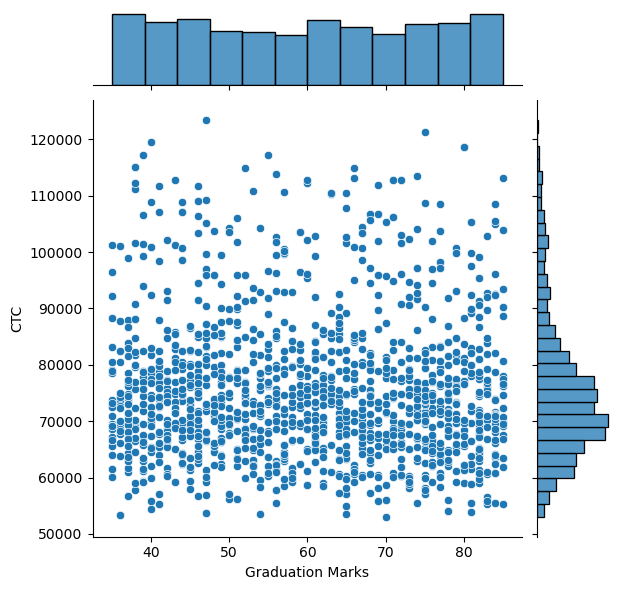

In [19]:
sns.jointplot(x = "Graduation Marks", y = "CTC", data = df)

C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


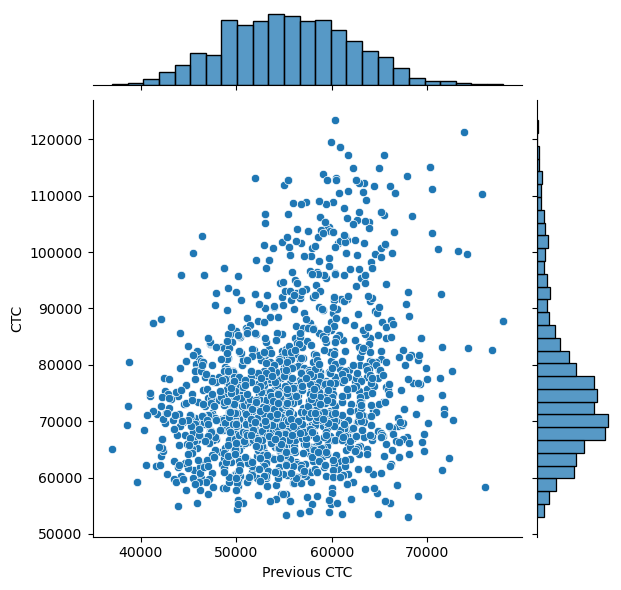

In [20]:
sns.jointplot(x = "Previous CTC", y = "CTC", data = df)

C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


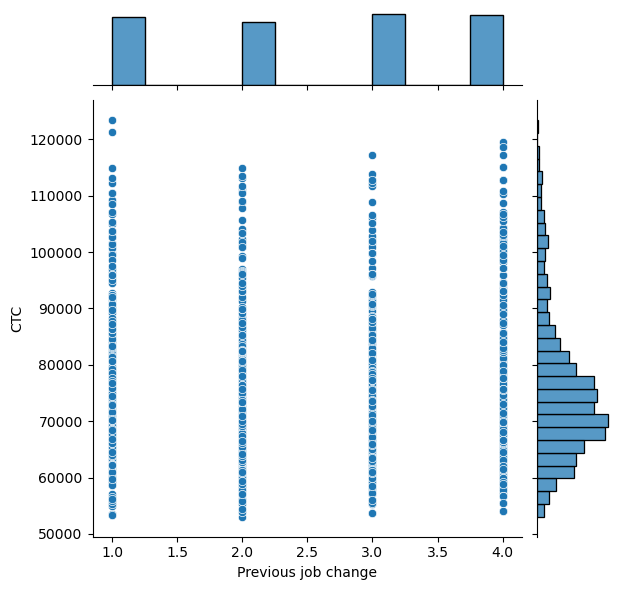

In [21]:
sns.jointplot(x = "Previous job change", y = "CTC", data = df)

C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


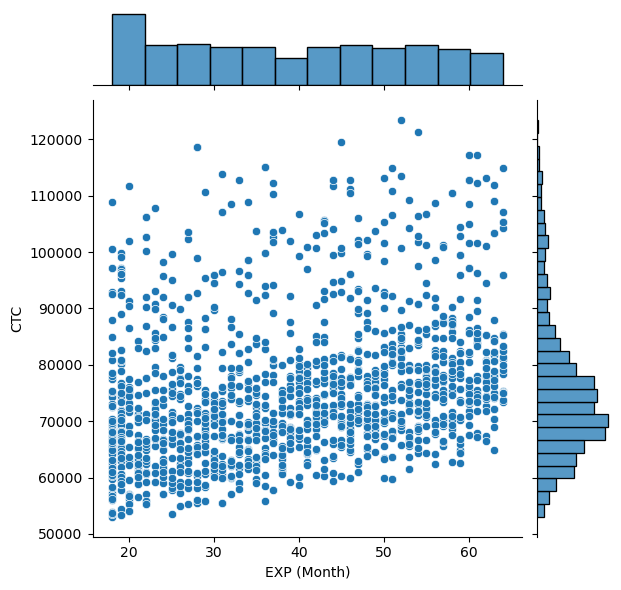

In [22]:
sns.jointplot(x = "EXP (Month)", y = "CTC", data = df)

# Creating Models

### Because our dependent variable is continuous, classification methods are not applicable therefore, we use regression techniques

## Model 1 = Multi Linear Regression

In [23]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


In [24]:
X_multi = df.loc[:, df.columns != "CTC"]

In [25]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [26]:
y_multi = df["CTC"]

In [27]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [28]:
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression

In [29]:
X_multi_cons = sn.add_constant(X_multi)

In [30]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,1.0,2,0,55523.0,3,66,19,1
1,1.0,2,0,57081.0,1,84,18,0
2,1.0,3,0,60347.0,2,52,28,0
3,1.0,3,0,49010.0,2,81,33,0
4,1.0,1,0,57879.0,4,74,32,0


In [31]:
m1_multi_stats = sn.OLS(y_multi, X_multi_cons).fit()

In [32]:
m1_multi_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          4.70e-257
Time:                        23:10:03   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
m1_multi_lr = LinearRegression()

In [34]:
m1_multi_lr.fit(X_multi , y_multi)

LinearRegression()

In [35]:
m1_multi_lr.intercept_

38421.109806896704

In [36]:
m1_multi_lr.coef_

array([-4.81514705e+02,  3.80830787e+02,  4.10090279e-01,  1.26565295e+02,
        6.23621203e+00,  2.61344394e+02,  1.94874279e+04])

In [37]:
y_pred = m1_multi_lr.predict(X_multi)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
mse = mean_squared_error(y_multi , y_pred)
r2 = r2_score(y_multi, y_pred)

In [40]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  73736458.29764368 
R2 Score - 0.5343159981702306


## Model2 - Random Forest Regressor

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestRegressor

In [42]:
X = df.loc[:, df.columns != "CTC"]

In [43]:
y = df["CTC"]

In [44]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [45]:
rf = RandomForestRegressor( n_estimators = 300 , random_state = 1)

In [46]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1)

In [47]:
prediction = rf.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

In [49]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  50725024.90967233 
R2 Score - 0.6581512548547499


## Model3 - Decision Tree Regressor

In [50]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [51]:
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [52]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [54]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  60424631.02613475 
R2 Score - 0.5927831611924911


In [55]:
dot_data = tree.export_graphviz(regtree, out_file = None , feature_names = X_train.columns, filled = True )

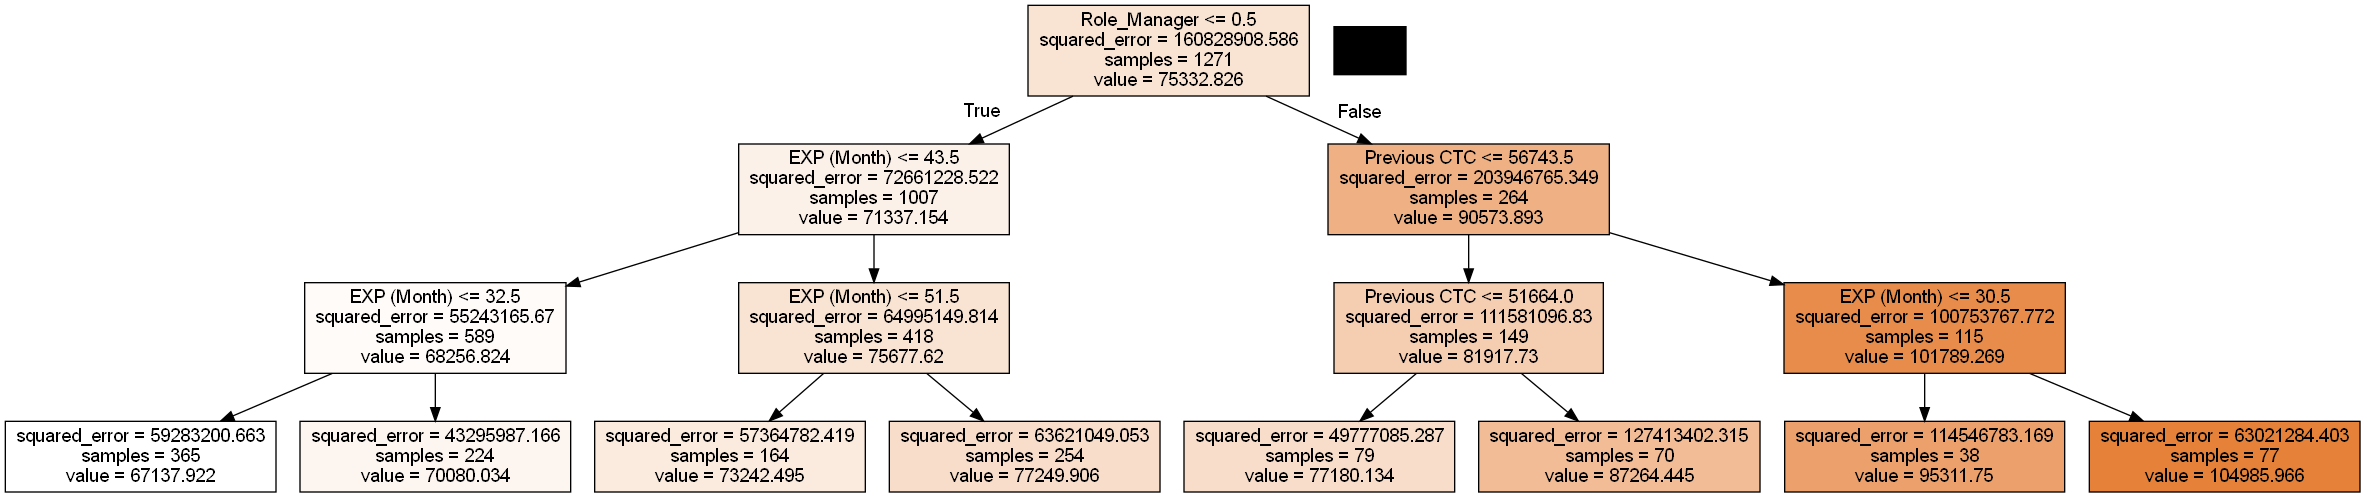

In [56]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Model4 - Gradient Boosting Machines Regressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [59]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [60]:
pred = model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

In [62]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  54506047.158160515 
R2 Score - 0.6326699916456412


## XGBoost Regressor

In [63]:
from xgboost import XGBRegressor

In [64]:
model5 = XGBRegressor(n_estimators = 300 , max_depth = 7 , learning_rate = 0.1)

In [65]:
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
pred = model5.predict(X_test)

In [67]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test , pred)

In [68]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  52697590.86263641 
R2 Score - 0.6448576350499731


## Model6 - Ridge Regression

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [70]:
scaler = StandardScaler()

In [71]:
scaler.fit(X_train)

StandardScaler()

In [72]:
X_train_s = scaler.transform(X_train)

In [73]:
X_test_s = scaler.transform(X_test)

In [74]:
lm_r = Ridge(alpha = 0.5)

In [75]:
lm_r.fit(X_train_s , y_train)

Ridge(alpha=0.5)

In [76]:
y_pred = lm_r.predict(X_test_s)

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68911963.65250452 
R2 Score - 0.5355848845406525


## Changing Hyper Parameter

In [79]:
from sklearn.model_selection import validation_curve


In [80]:
param_range = np.logspace(-2,8,100)

In [81]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [82]:
train_mean = np.mean(train_scores, axis = 1)

In [83]:
test_mean = np.mean(test_scores, axis = 1)

In [84]:
max(test_mean)

0.5258291929838951

C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


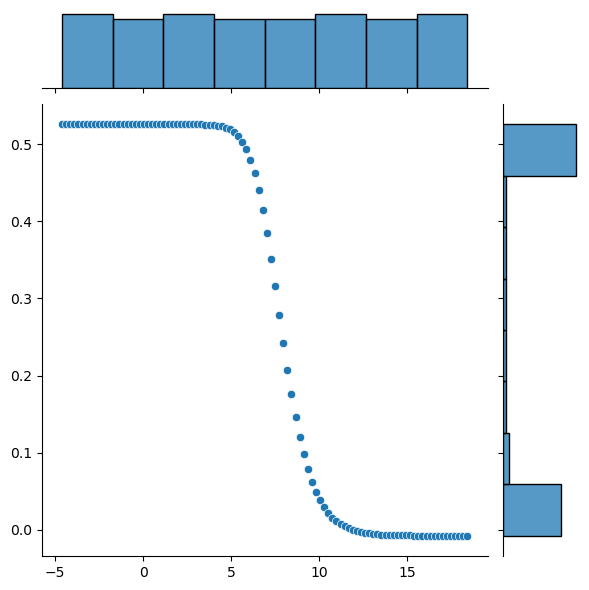

In [85]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [86]:
np.where(test_mean == max(test_mean))

(array([26], dtype=int64),)

In [87]:
param_range[26]

4.229242874389499

In [88]:
lm_r_best = Ridge(alpha = param_range[26])

In [89]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=4.229242874389499)

In [90]:
y_pred_best = lm_r.predict(X_test_s)

In [91]:
r2_score(y_test,y_pred_best)

0.5355848845406525

## Model 7 - Lasso Regression

In [92]:
from sklearn.linear_model import Lasso

In [93]:
lm_s = Lasso(alpha = 0.5)

In [94]:
lm_s.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [95]:
y_pred = lm_s.predict(X_test_s)

In [96]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [97]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  68908896.5345529 
R2 Score - 0.5356055546226256


## Changing Hyper Parameter

In [98]:
from sklearn.model_selection import validation_curve

In [99]:
param_range = np.logspace(-2,8,100)

In [100]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [101]:
train_mean = np.mean(train_scores, axis = 1)

In [102]:
test_mean = np.mean(test_scores, axis = 1)

In [103]:
max(test_mean)

0.5258340188547592

C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MANISH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


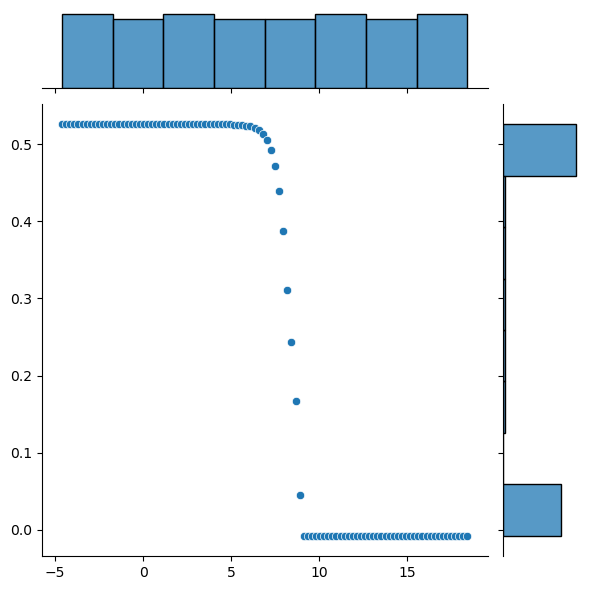

In [104]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [105]:
np.where(test_mean == max(test_mean))

(array([36], dtype=int64),)

In [106]:
param_range[36]

43.28761281083057

In [107]:
lm_s_best = Lasso(alpha = param_range[36])

In [108]:
lm_s_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

In [109]:
y_pred_best = lm_s.predict(X_test_s)

In [110]:
r2_score(y_test,y_pred_best)

0.5356055546226256

# Question and Answer 

## Q1 - Your views about the problem statement?

### The problem statement outlines the key business challenges of determining salaries for new hires. TechWorks Consulting focuses on various factors, including:

### * College
### * City
### * Previous CTC
### * Previous job change
### * Graduation marks
### * Experience (months)
### * Role
### The use of machine learning, specifically regression, indicates a modern approach to automate and optimize salary prediction based on the provided dataset.

## Q2- What will be your approach to solving this task?

### My Approach to Solving This Problem

#### 1. Data Preprocessing
#### - **Missing Values:** After analyzing the provided dataset, it was found that there are no missing values.
#### - **Outliers:** By analyzing and visualizing the dataset using scatter plots, it was determined that there are no outliers.
#### - **Categorical Variables:** The dataset includes categorical columns such as "College," "City," and "Role." Additional data for college and city were provided in another dataset. Using Pandas, this dataset was loaded, and the data was categorized by converting columns into lists and categorizing them. The "Role" column was categorized by creating dummy variables.

#### 2. Modeling
#### - **Model Selection:** Various regression models were evaluated, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regression, and XGBoost.
#### - **Evaluation:** The data was split into training, validation, and test sets. Model performance was evaluated using metrics such as Mean Squared Error (MSE), R-Squared, and Adjusted R-Squared on the validation set.
#### - **Tuning and Optimization:** Parameters such as learning rate and the number of trees/estimators were fine-tuned for optimal performance.

#### 3. Predictive Analysis
#### - **Prediction:** Once the final model was optimized, it was used to predict salaries for new employees based on their features. The predictions were analyzed, and the coefficients were interpreted to understand which features had the most significant impact on salary.
#### - **Monitoring:** The model's performance was monitored over time by tracking metrics such as R-Squared.

## Q3 - . What were the available ML model options you had to perform this task?

####  Available ML Model Options:
#### * Linear Regression
#### * Random Forest Regressor
#### *  Decision Tree Regressor
#### * Gradient Boosting Machine Regressor
#### * XGBoost
#### * Ridge Regression
#### * Lasso Regression

## Q4 - Which model’s performance is best and what could be the possible reason for that?


#### The Random Forest Regressor is the best model for predicting the salaries of newly hired employees for this dataset.

#### Reason
#### It achieves the highest accuracy and R2 score compared to other models, making it the most suitable choice for this task.

#### Accuracies or R2 Scores of ML Models:
#### - Linear Regression: 0.5343
#### - Ridge Regression: 0.5356
#### - Lasso Regression: 0.5356
#### - Decision Tree Regression: 0.5928
#### - Random Forest Regression: 0.6582
#### - Gradient Boosting Machine Regressor: 0.6327
#### - XGBoost: 0.6449

#### As shown above, the Random Forest Regressor has the highest R2 score of 0.6582, making it the best model for this dataset.

## Q5- What steps can you take to improve this selected model’s performance even further?

### Steps to Improve Model Performance

#### 1. **Gathering More Data:** Acquiring additional data can enhance the model's ability to generalize.
#### 2. **Hyperparameter Tuning:** Fine-tuning model hyperparameters ensures optimal performance.
#### 3. **Ensemble Methods:** Combining well-performing models through techniques like stacking or boosting can improve overall accuracy.
#### 4. **Early Stopping:** Implement early stopping to prevent overfitting by halting training when performance on the validation set declines.
#### 5. **Feature Importance Analysis:** Analyzing feature importance scores helps identify which features have the most impact on salary predictions.